# 📧 Email Spam Classifier

This is a mini-project implement using Naive-Bayes, Logistic Regression and SVM Models/algorithms. This project helps to identify whether the given email is 'Spam' or 'Non-spam'.
The dataset 'https://archive.ics.uci.edu/ml/datasets/spambase' used in this project to train the model.

### 📦 Import statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### 🚚 Load the dataset

In [ ]:
columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'is_spam'
]

df = pd.read_csv('spambase.data', header=None, names=columns)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 🔍 Inspect the dataset

In [114]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### 🔪 Split the data into 'Features' and 'Target/class' label

In [ ]:
X = df.drop(columns='is_spam', axis=1)
y = df['is_spam']

### 🔪 Split the data into train/test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape, X_test.shape)

(3220, 57)

(1381, 57)

### 📐 Scale the dataset and Model pipeline

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🏃 Train the models using SVM, Logistic Regression and Naive-Bayes

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

models = {
   'SVM': SVC(),
   'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
   'Naive-Bayes': GaussianNB()
}

conf_matrices = {}

for name, model in models.items():
  start = time.perf_counter()
  model.fit(X_train_scaled, y_train)
  print(f"Time taken for trained the model ({name}): {time.perf_counter() - start}s")

  start = time.perf_counter()
  y_pred = model.predict(X_test_scaled)
  print(f"Time taken for prediction ({name}): {time.perf_counter() - start}s")

  conf_matrices[name] = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print(f"Accuracy score ({name}): {round(accuracy_score(y_true=y_test, y_pred=y_pred)*100, 4)}%\n")

Time taken for trained the model (SVM): 0.2387598790010088s
Time taken for prediction (SVM): 0.13179411700002674s
Accuracy score (SVM): 93.483%

Time taken for trained the model (Logistic Regression): 0.0485988560012629s
Time taken for prediction (Logistic Regression): 0.000484038000649889s
Accuracy score (Logistic Regression): 92.3244%

Time taken for trained the model (Naive-Bayes): 0.003203078000296955s
Time taken for prediction (Naive-Bayes): 0.0010276329994667321s
Accuracy score (Naive-Bayes): 81.8248%



### 📊 Visualize the models performance by displaying confusion matrices

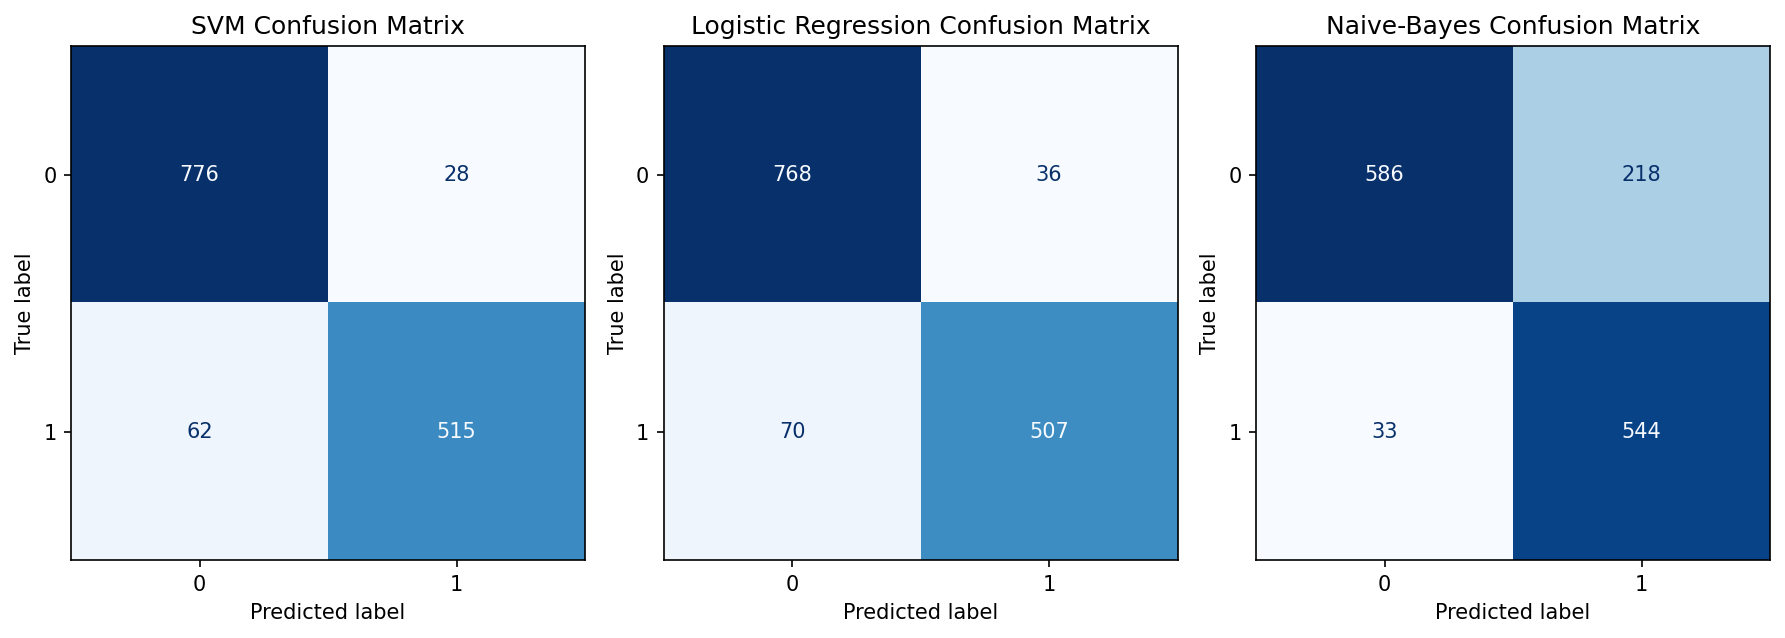

In [90]:
# Plot confusion matrices for all models side by side.
plt.figure(figsize=(12, 5), dpi=150)

for i, mat in enumerate(conf_matrices, 1):
  plt.subplot(1, 3, i)
  ConfusionMatrixDisplay(conf_matrices.get(mat)).plot(cmap='Blues', ax=plt.gca(), colorbar=False)
  plt.title(f'{mat} Confusion Matrix')

plt.tight_layout()
plt.show()

### 📊 Visualize feature importance (Logistic Regression coefficients)

In [99]:
log_model = models['Logistic Regression']

coefficients = log_model.coef_[0]

imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

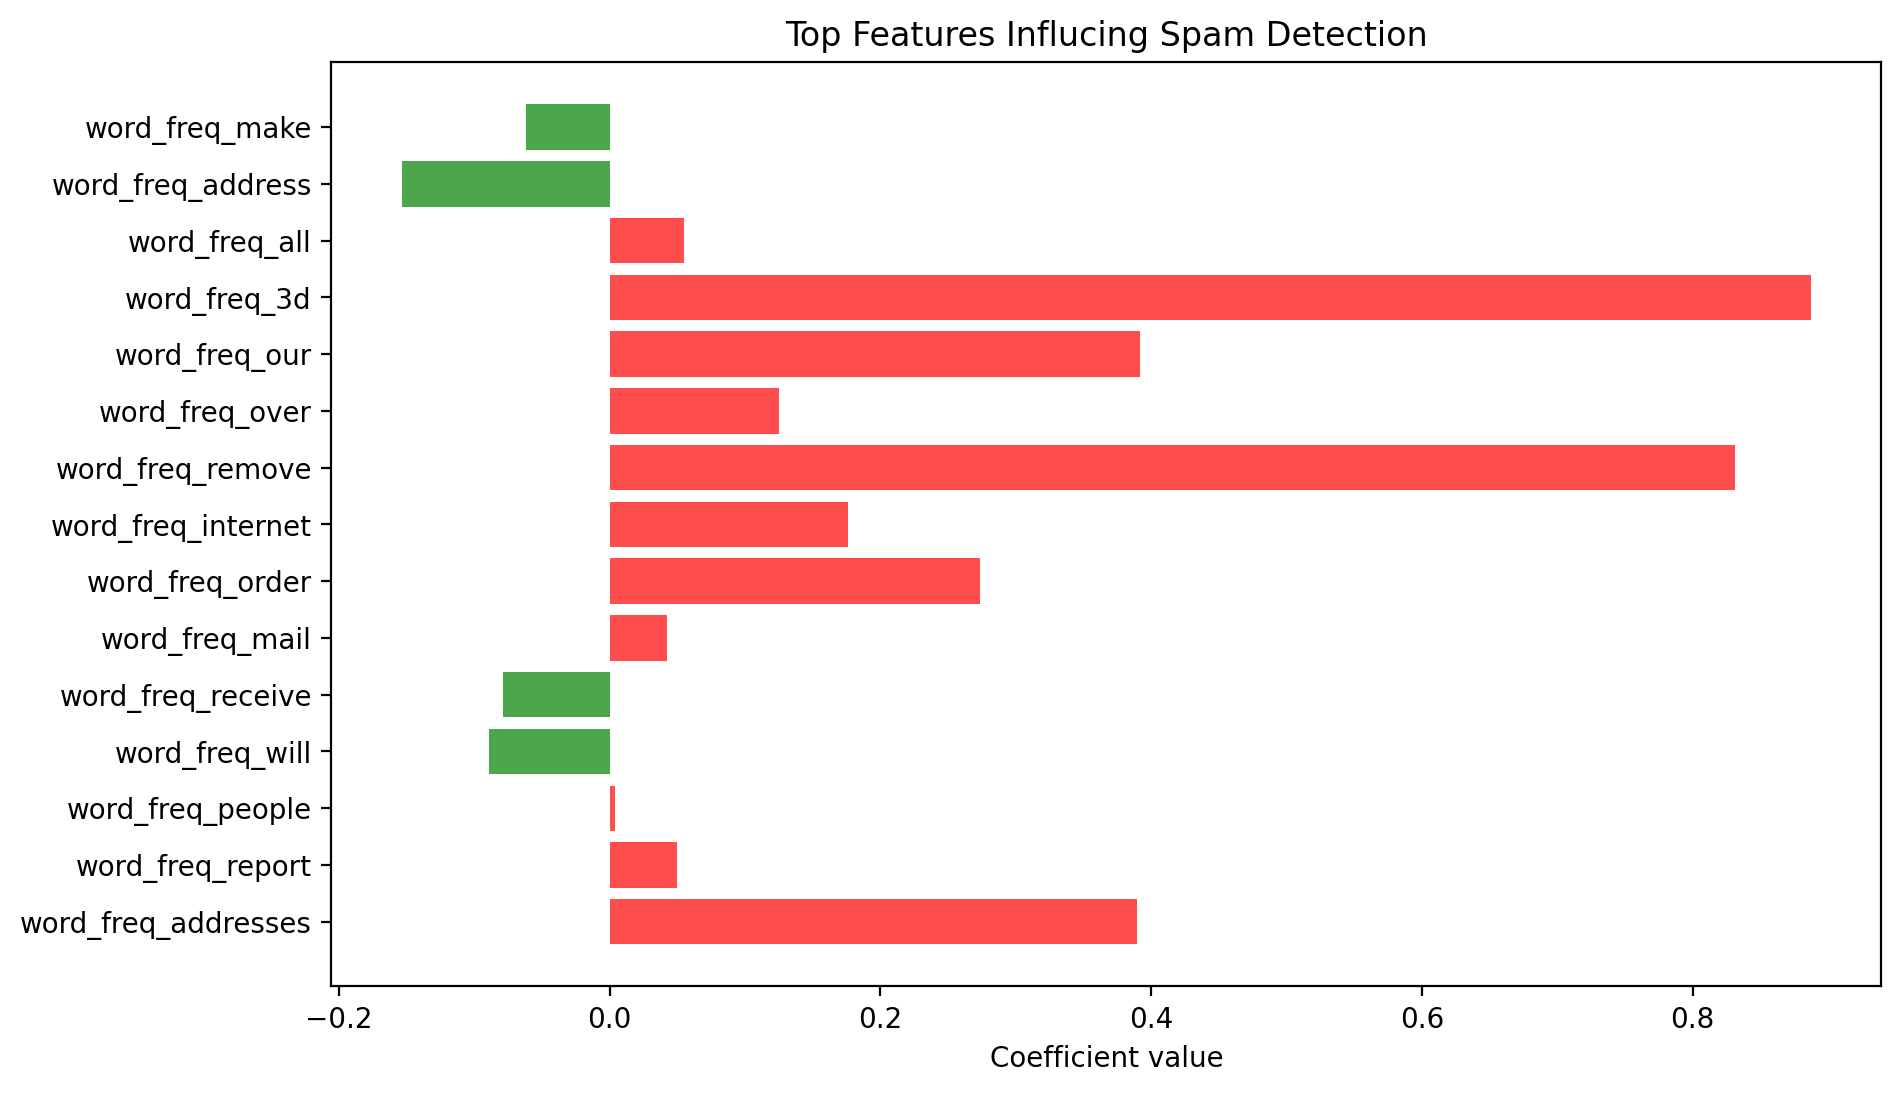

In [112]:
top_records = imp_df.head(15)
colors = ['red' if c > 0 else 'green' for c in top_records['Coefficient']]

plt.figure(figsize=(10,6), dpi=200)
plt.barh(top_records['Feature'], top_records['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient value')
plt.title('Top Features Influcing Spam Detection')
plt.gca().invert_yaxis()
plt.show()

### ✍ Conclusion:

Here, in this dataset most of the features shows increase/decrease chances of spaming words based on the above horizontal bar graph.

About the models performance, We have used three models: 'Support Vector Machine', 'Logistic Regression' and 'Naive-Bayes'.

As you observe that the SVM model has high accuracy score compared to others two. However, the time taken for train the model and for prediction have much higher than compared to others two which takes very less time for train and prediction.